# Emotion Classification in Text


The goal of this project is to develop machine learning models to classify emotions in text samples. We will use the provided dataset to preprocess the text, extract features, train models, and evaluate their performance.

## Loading and Preprocessing

In this section, we will load the dataset and perform preprocessing steps to prepare the data.It includes:

- **Loading the dataset:** Importing the data into a DataFrame.
- **Text cleaning:** Removing punctuation and numbers from the text.
- **Tokenization:** Splitting the text into individual words.
- **Stopwords removal:** Eliminating common words that do not contribute to emotion classification.

In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
file = "C:/Users/user/Desktop/Dataset/nlp_dataset.csv"
df = pd.read_csv(file)

df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


### Preprocessing

We will define a preprocessing function to clean the text. This involves removing punctuation, numbers, converting to lowercase, tokenizing, and removing stopwords.

In [11]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits
    text = text.lower()                   # Convert to lowercase
    tokens = word_tokenize(text)          # Tokenize text
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)   

In [12]:
df['cleaned_text'] = df['Comment'].apply(preprocess_text)

df[['cleaned_text', 'Emotion']].head()

,cleaned_text,Emotion
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear


## 2. Feature Extraction

In this step, we will convert the cleaned text data into numerical features that can be used by machine learning models. We will use the `TfidfVectorizer` to transform the text data into a TF-IDF matrix.

- **TF-IDF (Term Frequency-Inverse Document Frequency):** This method reflects the importance of words in the text relative to their occurrence across all documents.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Emotion']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((4155, 8815), (1782, 8815))

## 3. Model Development

We will train two machine learning models on the preprocessed data:

- **Naive Bayes:** A probabilistic classifier that works well with text data.
- **Support Vector Machine (SVM):** A powerful model suitable for high-dimensional spaces.

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

## 4. Model Comparison

In this section, we will evaluate and compare the performance of the Naive Bayes and SVM models using accuracy and F1-score. These metrics will help us understand how well each model performs in classifying emotions.

- **Accuracy:** The proportion of correctly classified instances.
- **F1-Score:** A weighted average of precision and recall, providing a balance between them.

In [16]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Print results
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print(f'Naive Bayes F1-Score: {nb_f1:.2f}')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM F1-Score: {svm_f1:.2f}')

Naive Bayes Accuracy: 0.90
Naive Bayes F1-Score: 0.90
SVM Accuracy: 0.92
SVM F1-Score: 0.92


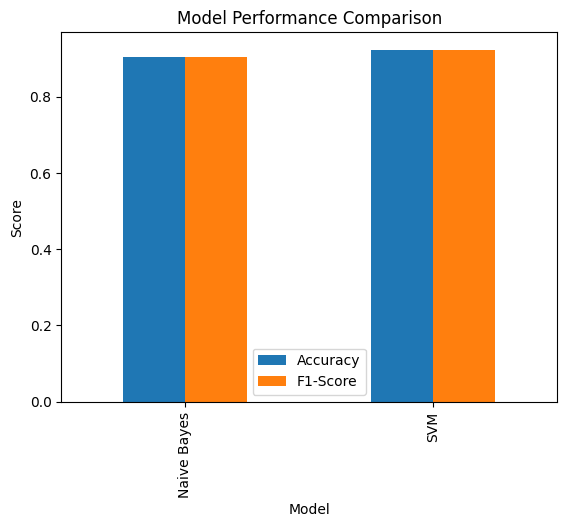

In [17]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

metrics = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [nb_accuracy, svm_accuracy],
    'F1-Score': [nb_f1, svm_f1]
})

metrics.plot(x='Model', kind='bar', stacked=False)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


## Predicting New Sentences

In this section, we will use the trained models to predict emotions for new text samples. We will preprocess the new text, transform it using the `TfidfVectorizer`, and then use the Naive Bayes and SVM models to make predictions.

### New Sentence Prediction

We will define a function that takes a new sentence, preprocesses it, extracts features, and then predicts the emotion using both models.


In [18]:
def predict_emotion(sentence):
    # Preprocess the new sentence
    cleaned_sentence = preprocess_text(sentence)
    
    # Transform the new sentence using the same vectorizer
    sentence_vector = vectorizer.transform([cleaned_sentence])
    
    # Predict using Naive Bayes model
    nb_prediction = nb_model.predict(sentence_vector)[0]
    
    # Predict using SVM model
    svm_prediction = svm_model.predict(sentence_vector)[0]
    
    return nb_prediction, svm_prediction

# Test with new sentences
new_sentences = [
    "I am feeling great today!",
    "I am very sad about the news.",
    "The weather is okay, neither too good nor too bad.",
    "I am excited for the upcoming event!",
]

# Get predictions
for sentence in new_sentences:
    nb_pred, svm_pred = predict_emotion(sentence)
    print(f'Sentence: "{sentence}"')
    print(f'Naive Bayes Prediction: {nb_pred}')
    print(f'SVM Prediction: {svm_pred}')
    print('-' * 50)


Sentence: "I am feeling great today!"
Naive Bayes Prediction: joy
SVM Prediction: joy
--------------------------------------------------
Sentence: "I am very sad about the news."
Naive Bayes Prediction: fear
SVM Prediction: anger
--------------------------------------------------
Sentence: "The weather is okay, neither too good nor too bad."
Naive Bayes Prediction: anger
SVM Prediction: joy
--------------------------------------------------
Sentence: "I am excited for the upcoming event!"
Naive Bayes Prediction: joy
SVM Prediction: joy
--------------------------------------------------


### Explanation of Predicting new sentenses

1. **Preprocessing:** We apply the same preprocessing steps to the new sentence as we did to the training data.
2. **Feature Extraction:** We use the `TfidfVectorizer` to transform the preprocessed text into numerical features.
3. **Prediction:** Both the Naive Bayes and SVM models are used to predict the emotion of the new sentence.

This section allows you to evaluate how well the trained models can classify new text samples and provides insights into their practical applicability.

## Conclusion

In this project, we implemented machine learning models to classify emotions in text data. We examined different preprocessing techniques, utilized TF-IDF for feature extraction, and evaluated the performance of both Naive Bayes and SVM models. Each model demonstrated distinct strengths, and our results highlighted their effectiveness for emotion classification.